In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
def read(add):
    return pd.read_csv(add,dtype='unicode')

In [4]:
df=read('./archive/final.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974363 entries, 0 to 5974362
Data columns (total 70 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Unnamed: 0         object
 1   Dst Port           object
 2   Protocol           object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min   

In [6]:
df.head()

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,443.0,6.0,198.0,3.0,0.0,77.0,0.0,46.0,0.0,25.66666667,23.45918441,0.0,0.0,0.0,0.0,388888.8889,15151.51515,99.0,121.6223664,185.0,13.0,198.0,99.0,121.6223664,185.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,0.0,15151.51515,0.0,0.0,46.0,30.75,21.68524844,470.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,25.66666667,0.0,3.0,77.0,0.0,0.0,256.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infilteration
1,1,443.0,6.0,223.0,3.0,0.0,77.0,0.0,46.0,0.0,25.66666667,23.45918441,0.0,0.0,0.0,0.0,345291.4798,13452.9148,111.5,130.8147545,204.0,19.0,223.0,111.5,130.8147545,204.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,0.0,13452.9148,0.0,0.0,46.0,30.75,21.68524844,470.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,25.66666667,0.0,3.0,77.0,0.0,0.0,256.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infilteration
2,2,443.0,6.0,587.0,3.0,0.0,77.0,0.0,46.0,0.0,25.66666667,23.45918441,0.0,0.0,0.0,0.0,131175.4685,5110.732538,293.5,395.2726907,573.0,14.0,587.0,293.5,395.2726907,573.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,0.0,5110.732538,0.0,0.0,46.0,30.75,21.68524844,470.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,25.66666667,0.0,3.0,77.0,0.0,0.0,258.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infilteration
3,3,443.0,6.0,763.0,3.0,0.0,77.0,0.0,46.0,0.0,25.66666667,23.45918441,0.0,0.0,0.0,0.0,100917.4312,3931.847969,381.5,526.794552,754.0,9.0,763.0,381.5,526.794552,754.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,0.0,3931.847969,0.0,0.0,46.0,30.75,21.68524844,470.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,25.66666667,0.0,3.0,77.0,0.0,0.0,254.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infilteration
4,4,443.0,6.0,852.0,3.0,0.0,77.0,0.0,46.0,0.0,25.66666667,23.45918441,0.0,0.0,0.0,0.0,90375.58685,3521.126761,426.0,589.7270555,843.0,9.0,852.0,426.0,589.7270555,843.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0,0.0,3521.126761,0.0,0.0,46.0,30.75,21.68524844,470.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,25.66666667,0.0,3.0,77.0,0.0,0.0,258.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infilteration


In [7]:
df.drop(columns='Unnamed: 0',inplace=True)

In [8]:
def duplicates(df,dropp=False):
    if dropp==True:
        df=df.drop_duplicates().reset_index(drop=True)
    print(f"Duplicates :{df.duplicated().sum()}")

In [9]:
duplicates(df,True)

Duplicates :0


In [10]:
def drop_col(df,col=None,dropp=False):
    if dropp==True:
        df.drop(columns=col,inplace=True)
    else:
        return df.isnull().sum()

In [11]:
const_columns= ['Timestamp','Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']

In [12]:
drop_col(df,const_columns)

Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 69, dtype: int64

In [13]:
def to_numeric(df,i):
    df[i]=pd.to_numeric(df[i],errors='coerce')
    

In [14]:
for i in df.drop(columns='Label').columns:
    print(i)
    to_numeric(df,i)
    

Dst Port
Protocol
Flow Duration
Tot Fwd Pkts
Tot Bwd Pkts
TotLen Fwd Pkts
TotLen Bwd Pkts
Fwd Pkt Len Max
Fwd Pkt Len Min
Fwd Pkt Len Mean
Fwd Pkt Len Std
Bwd Pkt Len Max
Bwd Pkt Len Min
Bwd Pkt Len Mean
Bwd Pkt Len Std
Flow Byts/s
Flow Pkts/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Tot
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Tot
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd PSH Flags
Fwd Header Len
Bwd Header Len
Fwd Pkts/s
Bwd Pkts/s
Pkt Len Min
Pkt Len Max
Pkt Len Mean
Pkt Len Std
Pkt Len Var
FIN Flag Cnt
SYN Flag Cnt
RST Flag Cnt
PSH Flag Cnt
ACK Flag Cnt
URG Flag Cnt
ECE Flag Cnt
Down/Up Ratio
Pkt Size Avg
Fwd Seg Size Avg
Bwd Seg Size Avg
Subflow Fwd Pkts
Subflow Fwd Byts
Subflow Bwd Pkts
Subflow Bwd Byts
Init Fwd Win Byts
Init Bwd Win Byts
Fwd Act Data Pkts
Fwd Seg Size Min
Active Mean
Active Std
Active Max
Active Min
Idle Mean
Idle Std
Idle Max
Idle Min


In [15]:
def inff(df):
    for i in df.drop('Label',axis=1).columns:
        if df[np.isinf(df[i])].shape[0]>1:
            df.loc[np.isinf(df[i]),i]=np.nan
            print(i)
            
            

In [16]:
inff(df)

In [17]:
def dropna(df):
    df=df.dropna().reset_index(drop=True)

In [18]:
dropna(df)

In [19]:
null=drop_col(df)

In [20]:
null[null>0]

Series([], dtype: int64)

<Axes: xlabel='Label'>

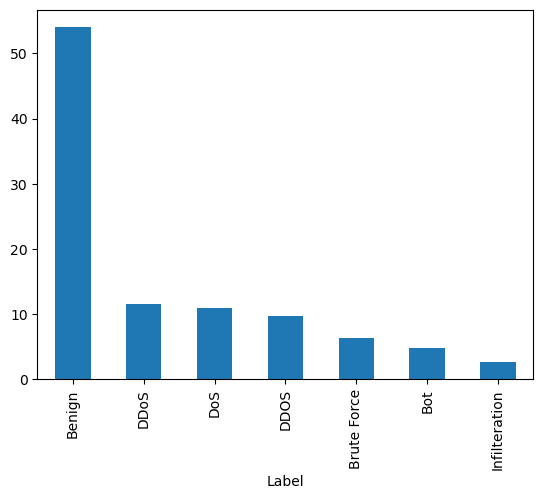

In [21]:
(df['Label'].value_counts()/len(df)*100).plot(kind='bar')

In [22]:
label_encode={'Infilteration': 5,
 'Benign': 0,
 'DoS': 1,
 'DDoS': 2,
 'Bot': 3,
 'Brute Force': 4,
 'DDOS': 2}

In [23]:
df['Label']=df['Label'].map(label_encode)

## Pipeline

In [25]:
len(list(df.columns))

69

In [26]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
grad_boost = GradientBoostingClassifier(n_estimators=50, random_state=42)
svm = SVC(probability=True, kernel='linear', random_state=42)
log_reg = LogisticRegression(random_state=42)

In [27]:
from sklearn.preprocessing import MinMaxScaler as mm
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer as CT
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

In [28]:
#t1
# custom Trasnformer
class dropcol(BaseEstimator,TransformerMixin):
    def __init__(self,columns_drop):
        self.columns_drop=columns_drop
    def fit(self,x,y=None):
        return self
    def transform(self,x):
        try:
            xx=x.drop(self.columns_drop)
            return xx
        except:
            return x

In [29]:
#t2
fillna=CT(transformers=[('fillna',SimpleImputer(),['Dst Port',
 'Protocol',
 'Flow Duration',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Std',
 'Idle Max',
 'Idle Min'])],remainder='passthrough')

In [30]:
normalize=CT(transformers=[('normalize',mm(),slice(0,70))],remainder='passthrough')

In [31]:
model=VotingClassifier(estimators=[
    ('ada_boost', ada_boost),
    ('grad_boost', grad_boost),
    ('svm', svm),
    ('log_reg', log_reg)
], voting='soft') 

In [32]:
pipeline=Pipeline([('drop',dropcol(const_columns)),
                  ('fillna',fillna),
                  ('normalize',normalize),
                  ])

In [33]:
pipeline

Pipeline(steps=[('drop',
                 dropcol(columns_drop=['Timestamp', 'Bwd PSH Flags',
                                       'Fwd URG Flags', 'Bwd URG Flags',
                                       'CWE Flag Count', 'Fwd Byts/b Avg',
                                       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
                                       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
                                       'Bwd Blk Rate Avg'])),
                ('fillna',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fillna', SimpleImputer(),
                                                  ['Dst Port', 'Protocol',
                                                   'Flow Duration',
                                                   'Tot Fwd Pkts...
                                                   'Bwd Pkt Len Min',
                                                   'Bwd Pkt Len Mean',
                                                   'Bwd Pkt Len Std',
                                                   'Flow Byts/s', 'Flow Pkts/s',
                                                   'Flow IAT Mean',
                                                   'Flow IAT Std',
                                                   'Flow IAT Max',
                                                   'Flow IAT Min',
                                                   'Fwd IAT Tot',
                                                   'Fwd IAT Mean',
                                                   'Fwd IAT Std', 'Fwd IAT Max',
                                                   'Fwd IAT Min', 'Bwd IAT Tot',
                                                   'Bwd IAT Mean',
                                                   'Bwd IAT Std', 'Bwd IAT Max', ...])])),
                ('normalize',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normalize', MinMaxScaler(),
                                                  slice(0, 70, None))]))])

In [34]:
value=df.Label.value_counts()

In [35]:
# df[df['Label']==2].reset_index(drop=True).loc[:round(len(df)*0.02)]

In [36]:
for i,j,k in zip(value.index,value.values,[0.0054,0.0021,0.0010,0.0006,0.0004,0.0002]):
    x=df[df['Label']==i][:round(len(df)*k)]
    # print(i)
    # print(x)
    if i==0:
        df_new=x.copy()
        print(i)
        continue
    df_new=pd.concat([df_new,x])
    

0


In [37]:
df_new=df_new.reset_index(drop=True)

In [38]:
df_new

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443.0,6.0,94658.0,6.0,7.0,708.0,3718.0,387.0,0.0,118.000000,159.284651,1460.0,0.0,531.142857,673.118224,46757.801771,137.336517,7.888167e+03,1.113004e+04,24325.0,0.0,72880.0,14576.000,1.259038e+04,24385.0,363.0,72178.0,1.202967e+04,1.318926e+04,24718.0,0.0,0.0,132.0,152.0,63.386085,73.950432,0.0,1460.0,316.142857,519.205881,269574.747253,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,340.461538,118.000000,531.142857,6.0,708.0,7.0,3718.0,8192.0,7484.0,3.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0
1,443.0,6.0,206.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,9708.737864,2.060000e+02,0.000000e+00,206.0,206.0,206.0,206.000,0.000000e+00,206.0,206.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,40.0,0.0,9708.737864,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,258.0,-1.0,0.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0
2,445.0,6.0,165505.0,3.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,24.168454,5.516833e+04,9.547815e+04,165417.0,35.0,165505.0,82752.500,1.169802e+05,165470.0,35.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,72.0,32.0,18.126341,6.042114,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,0.0,1.0,0.0,8192.0,8192.0,0.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0
3,443.0,6.0,102429.0,6.0,7.0,708.0,3718.0,387.0,0.0,118.000000,159.284651,1460.0,0.0,531.142857,673.118224,43210.418924,126.917182,8.535750e+03,1.095664e+04,24473.0,0.0,80271.0,16054.200,1.426975e+04,31379.0,366.0,79733.0,1.328883e+04,1.475348e+04,30931.0,0.0,0.0,132.0,152.0,58.577161,68.340021,0.0,1460.0,316.142857,519.205881,269574.747253,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,340.461538,118.000000,531.142857,6.0,708.0,7.0,3718.0,8192.0,7484.0,3.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0
4,443.0,6.0,167.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,11976.047904,1.670000e+02,0.000000e+00,167.0,167.0,167.0,167.000,0.000000e+00,167.0,167.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,40.0,0.0,11976.047904,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,258.0,-1.0,0.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57947,443.0,6.0,118452719.0,22.0,28.0,856.0,23554.0,209.0,0.0,38.909091,68.502978,1430.0,0.0,841.214286,681.078957,206.073784,0.422109,2.417402e+06,1.170000e+07,58900000.0,1.0,118000000.0,5640605.667,1.760000e+07,58900000.0,126.0,118000000.0,4.381363e+06,1.560000e+07,59100000.0,1.0,0.0,452.0,572.0,0.185728,0.236381,0.0,1430.0,478.627451,644.778534,415739.358400,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,488.200000,38.909091,841.214286,22.0,856.0,28.0,23554.0,8192.0,180.0,8.0,20.0,680562.0,742276.8583,1205431.0,155693.0,58500

In [39]:
df_new.Label.value_counts()/len(df_new)*100

Label
0    55.670210
2    21.648951
1    10.308531
4     6.186154
3     4.124103
5     2.062051
Name: count, dtype: float64

In [40]:
value/len(df)*100

Label
0    54.022764
2    21.155946
1    10.951795
4     6.390372
3     4.790318
5     2.688805
Name: count, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split as tts

In [42]:
pipeline.fit(df_new.drop(columns='Label'))

Pipeline(steps=[('drop',
                 dropcol(columns_drop=['Timestamp', 'Bwd PSH Flags',
                                       'Fwd URG Flags', 'Bwd URG Flags',
                                       'CWE Flag Count', 'Fwd Byts/b Avg',
                                       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
                                       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
                                       'Bwd Blk Rate Avg'])),
                ('fillna',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fillna', SimpleImputer(),
                                                  ['Dst Port', 'Protocol',
                                                   'Flow Duration',
                                                   'Tot Fwd Pkts...
                                                   'Bwd Pkt Len Min',
                                                   'Bwd Pkt Len Mean',
                                                   'Bwd Pkt Len Std',
                                                   'Flow Byts/s', 'Flow Pkts/s',
                                                   'Flow IAT Mean',
                                                   'Flow IAT Std',
                                                   'Flow IAT Max',
                                                   'Flow IAT Min',
                                                   'Fwd IAT Tot',
                                                   'Fwd IAT Mean',
                                                   'Fwd IAT Std', 'Fwd IAT Max',
                                                   'Fwd IAT Min', 'Bwd IAT Tot',
                                                   'Bwd IAT Mean',
                                                   'Bwd IAT Std', 'Bwd IAT Max', ...])])),
                ('normalize',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('normalize', MinMaxScaler(),
                                                  slice(0, 70, None))]))])

In [43]:
x_train,x_test,y_train,y_test=tts(df_new.drop(columns='Label'),df_new['Label'],test_size=0.3,random_state=69)

In [44]:
x_train=pipeline.transform(x_train)

In [45]:
x_test=pipeline.transform(x_test)

In [46]:
model.fit(x_train,y_train)

C:\Users\K.Murugesh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\K.Murugesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('ada_boost', AdaBoostClassifier(random_state=42)),
                             ('grad_boost',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=42)),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('log_reg', LogisticRegression(random_state=42))],
                 voting='soft')

In [47]:
from sklearn.metrics import classification_report as CR , confusion_matrix as CM

In [48]:
cm=CM(y_test,model.predict(x_test))

In [49]:
cm

array([[9515,    3,   35,    0,    1,    0],
       [   0, 1806,    0,    0,   21,    0],
       [   9,    0, 3838,    0,    0,    0],
       [ 382,    0,    0,  359,    0,    0],
       [  60,  663,    0,    0,  335,    0],
       [ 358,    0,    1,    0,    0,    0]], dtype=int64)

<Axes: >

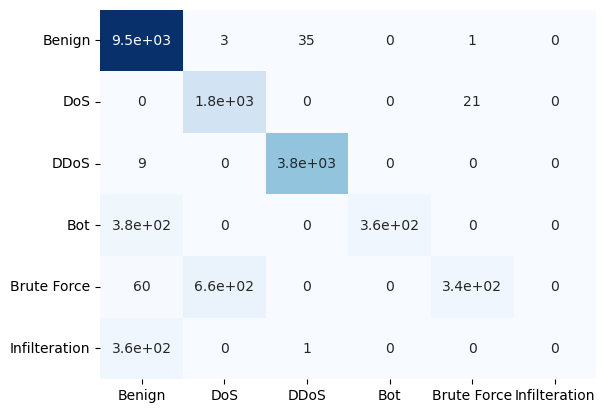

In [50]:
sns.heatmap(data=cm,annot=True,cmap='Blues',cbar=False,xticklabels=['Benign',
 'DoS',
 'DDoS',
 'Bot',
 'Brute Force',
'Infilteration'],yticklabels=['Benign',
 'DoS',
 'DDoS',
 'Bot',
 'Brute Force',
'Infilteration'])

In [51]:
cr=CR(y_test,model.predict(x_test))

C:\Users\K.Murugesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\K.Murugesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\K.Murugesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
print(cr)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9554
           1       0.73      0.99      0.84      1827
           2       0.99      1.00      0.99      3847
           3       1.00      0.48      0.65       741
           4       0.94      0.32      0.47      1058
           5       0.00      0.00      0.00       359

    accuracy                           0.91     17386
   macro avg       0.76      0.63      0.65     17386
weighted avg       0.90      0.91      0.89     17386



In [53]:
model.score(x_test,y_test)

0.9118256068100771

In [54]:
import pickle
with open('pipeline1.pickel','wb') as file:
    pickle.dump(pipeline,file)

In [55]:
with open('model.pickel','wb') as file:
    pickle.dump(model,file)

In [178]:
#test=read("../network/02-21-2018.csv")

In [180]:
#test=test.sample(n=100,random_state=69)

In [182]:
#test=test.loc[:100]

In [184]:
#time=test['Timestamp']

In [188]:
#time

In [190]:
#test.drop(columns='Label',inplace=True)

In [192]:
#test.drop(columns='Timestamp',inplace=True)

In [63]:
#for i in test.columns:
    #to_numeric(test,i)

In [64]:
#test

In [65]:
#test.info()

In [66]:
#out=pd.DataFrame(data={'time':time.values,'label':model.predict(pipeline.transform(test))})

In [67]:
#out['time']=pd.to_datetime(out['time'],dayfirst=True).dt.time

In [68]:
#out=out.sort_values('time')

In [69]:
#for i in out.columns:
    #to_numeric(out,i)

In [70]:
#out.label.value_counts()

In [71]:
#plt.figure(figsize=(15,10))
#plt.plot(out.time,out.label,'x--')
#plt.xticks(rotation=90)
#plt.yticks([0,1,2,3,4,5],['Benign','DoS','DDoS','Bot','Brute Force','Infilteration'])
#plt.show()

In [72]:
#label_encode

In [73]:
#['Benign','DoS','DDoS','Bot','Brute Force','Infilteration']